In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

645

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


tasiilaq gl
kruisfontein za
byron bay au
geraldton au
carnarvon au
avera pf
vestmannaeyjar is
inuvik ca
bubaque gw
rungata ki
rikitea pf
tasiilaq gl
camacha pt
hualmay pe
katha mm
san fernando mx
grants us
anadyr ru
la tuque ca
busselton au
hilo us
port alfred za
nikolskoye ru
torbay ca
bengkulu id
ahuimanu us
coahuayana mx
pangody ru
solnechnyy ru
cidreira br
luderitz na
pisco pe
upernavik gl
cherskiy ru
olafsvik is
ilulissat gl
taolanaro mg
chokurdakh ru
tasiilaq gl
pedro carbo ec
lebu cl
atuona pf
nyrob ru
punta arenas cl
paamiut gl
mys shmidta ru
taolanaro mg
karur in
upernavik gl
kruisfontein za
koungou yt
nikolskoye ru
tasiilaq gl
atuona pf
east london za
lakatoro vu
bluff nz
uyemskiy ru
malindi ke
turukhansk ru
bredasdorp za
ankang cn
saint-philippe re
ponta do sol cv
barrow us
hobart au
dikson ru
husavik is
attawapiskat ca
taoudenni ml
rikitea pf
vaini to
roald no
albany au
mataura pf
ayan ru
kilmez ru
mataura pf
whitianga nz
ust-kut ru
pardi in
tuatapere nz
bethel us
iqaluit c

taolanaro mg
new norfolk au
arcelia mx
cabo san lucas mx
ye mm
butaritari ki
kodiak us
haradok by
cape town za
punta arenas cl
sentyabrskiy ru
moose factory ca
nikolskoye ru
rikitea pf
rikitea pf
porciuncula br
ribeira grande pt
garowe so
cape town za
praia da vitoria pt
qaanaaq gl
atuona pf
avarua ck
broome au
isangel vu
samarai pg
saint-philippe re
clyde river ca
tasiilaq gl
barentsburg sj
ambon id
norman wells ca
port elizabeth za
punta arenas cl
mataura pf
georgetown sh
chapais ca
mar del plata ar
nizhneyansk ru
luderitz na
hermanus za
hofn is
kaspiysk ru
duz tn
albany au
barentsburg sj
mataura pf
airai pw
mataura pf
yerbogachen ru
lebu cl
port alfred za
perry us
cape town za
srednekolymsk ru
cabo san lucas mx
palmer us
barentsburg sj
kavaratti in
halmaj hu
pevek ru
tilichiki ru
esperance au
lorengau pg
severo-kurilsk ru
batagay-alyta ru
mugur-aksy ru
hobart au
lompoc us
rayevskaya ru
taolanaro mg
tiksi ru
castro cl
hithadhoo mv
barrow us
punta arenas cl
kapaa us
toliary mg
sorland

comodoro rivadavia ar
viligili mv
lazaro cardenas mx
mataura pf
atuona pf
vila franca do campo pt
cherskiy ru
upernavik gl
taolanaro mg
la rosa hn
san carlos de bariloche ar
illoqqortoormiut gl
bluff nz
ushuaia ar
atuona pf
aitape pg
manta ec
taolanaro mg
talaya ru
punta arenas cl
ovalle cl
norman wells ca
kapaa us
lebu cl
severo-kurilsk ru
dingle ie
san patricio mx


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | byron bay
Processing Record 4 of Set 1 | geraldton
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | avera
Processing Record 7 of Set 1 | vestmannaeyjar
Processing Record 8 of Set 1 | inuvik
Processing Record 9 of Set 1 | bubaque
Processing Record 10 of Set 1 | rungata
City not found. Skipping...
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | camacha
Processing Record 13 of Set 1 | hualmay
Processing Record 14 of Set 1 | katha
City not found. Skipping...
Processing Record 15 of Set 1 | san fernando
Processing Record 16 of Set 1 | grants
Processing Record 17 of Set 1 | anadyr
Processing Record 18 of Set 1 | la tuque
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | 

Processing Record 38 of Set 4 | piro
Processing Record 39 of Set 4 | katherine
Processing Record 40 of Set 4 | nuuk
Processing Record 41 of Set 4 | marsa matruh
Processing Record 42 of Set 4 | ambodifototra
City not found. Skipping...
Processing Record 43 of Set 4 | lata
Processing Record 44 of Set 4 | vigrestad
Processing Record 45 of Set 4 | chuy
Processing Record 46 of Set 4 | nanortalik
Processing Record 47 of Set 4 | santa rosa del sur
Processing Record 48 of Set 4 | poum
Processing Record 49 of Set 4 | yellowknife
Processing Record 50 of Set 4 | muros
Processing Record 1 of Set 5 | urucara
Processing Record 2 of Set 5 | nadym
Processing Record 3 of Set 5 | kristiinankaupunki
Processing Record 4 of Set 5 | klyuchi
Processing Record 5 of Set 5 | sassandra
Processing Record 6 of Set 5 | cookshire
City not found. Skipping...
Processing Record 7 of Set 5 | avanigadda
Processing Record 8 of Set 5 | cefalu
Processing Record 9 of Set 5 | batagay
Processing Record 10 of Set 5 | saint-augu

Processing Record 28 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 29 of Set 8 | moose factory
Processing Record 30 of Set 8 | porciuncula
Processing Record 31 of Set 8 | ribeira grande
Processing Record 32 of Set 8 | garowe
Processing Record 33 of Set 8 | praia da vitoria
Processing Record 34 of Set 8 | samarai
Processing Record 35 of Set 8 | ambon
Processing Record 36 of Set 8 | chapais
Processing Record 37 of Set 8 | hofn
Processing Record 38 of Set 8 | kaspiysk
Processing Record 39 of Set 8 | duz
City not found. Skipping...
Processing Record 40 of Set 8 | airai
Processing Record 41 of Set 8 | perry
Processing Record 42 of Set 8 | srednekolymsk
Processing Record 43 of Set 8 | palmer
Processing Record 44 of Set 8 | kavaratti
Processing Record 45 of Set 8 | halmaj
Processing Record 46 of Set 8 | tilichiki
Processing Record 47 of Set 8 | lorengau
Processing Record 48 of Set 8 | mugur-aksy
Processing Record 49 of Set 8 | rayevskaya
Processing Record 50 of Set 8 |

Processing Record 14 of Set 12 | nelson bay
Processing Record 15 of Set 12 | aketi
Processing Record 16 of Set 12 | dukat
Processing Record 17 of Set 12 | longlac
City not found. Skipping...
Processing Record 18 of Set 12 | mgandu
Processing Record 19 of Set 12 | nevelsk
Processing Record 20 of Set 12 | stoyba
City not found. Skipping...
Processing Record 21 of Set 12 | mocajuba
Processing Record 22 of Set 12 | tabuk
Processing Record 23 of Set 12 | hastings
Processing Record 24 of Set 12 | zhanaozen
Processing Record 25 of Set 12 | yatou
Processing Record 26 of Set 12 | mani
Processing Record 27 of Set 12 | maryborough
Processing Record 28 of Set 12 | dawei
Processing Record 29 of Set 12 | karratha
Processing Record 30 of Set 12 | bargarh
Processing Record 31 of Set 12 | lucapa
Processing Record 32 of Set 12 | salalah
Processing Record 33 of Set 12 | evanston
Processing Record 34 of Set 12 | bocas del toro
Processing Record 35 of Set 12 | krasnoselkup
Processing Record 36 of Set 12 | 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,21.36,59,97,5.84,GL,2022-03-24 23:29:19
1,Kruisfontein,-34.0033,24.7314,61.88,87,32,11.45,ZA,2022-03-24 23:29:19
2,Byron Bay,-28.6500,153.6167,75.94,83,51,8.57,AU,2022-03-24 23:29:20
3,Geraldton,-28.7667,114.6000,86.41,25,73,20.71,AU,2022-03-24 23:27:22
4,Carnarvon,-24.8667,113.6333,78.87,65,85,0.00,AU,2022-03-24 23:29:21
5,Avera,33.1940,-82.5271,61.56,62,100,6.17,US,2022-03-24 23:29:21
6,Vestmannaeyjar,63.4427,-20.2734,42.71,77,100,4.50,IS,2022-03-24 23:29:21
7,Inuvik,68.3499,-133.7218,4.06,51,0,6.91,CA,2022-03-24 23:29:22
8,Bubaque,11.2833,-15.8333,75.74,71,4,16.51,GW,2022-03-24 23:29:22
9,Rikitea,-23.1203,-134.9692,79.90,70,100,13.67,PF,2022-03-24 23:29:23


In [14]:
# Reorder columns
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2022-03-24 23:29:19,65.6145,-37.6368,21.36,59,97,5.84
1,Kruisfontein,ZA,2022-03-24 23:29:19,-34.0033,24.7314,61.88,87,32,11.45
2,Byron Bay,AU,2022-03-24 23:29:20,-28.6500,153.6167,75.94,83,51,8.57
3,Geraldton,AU,2022-03-24 23:27:22,-28.7667,114.6000,86.41,25,73,20.71
4,Carnarvon,AU,2022-03-24 23:29:21,-24.8667,113.6333,78.87,65,85,0.00
...,...,...,...,...,...,...,...,...,...
583,San Carlos De Bariloche,AR,2022-03-24 23:46:00,-41.1456,-71.3082,58.75,47,0,4.61
584,Manta,EC,2022-03-24 23:46:00,-0.9500,-80.7333,82.18,78,20,6.91
585,Talaya,RU,2022-03-24 23:46:01,61.3833,152.7500,1.11,92,100,2.28
586,Ovalle,CL,2022-03-24 23:46:01,-30.5983,-71.2003,73.85,43,0,3.38


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities2.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

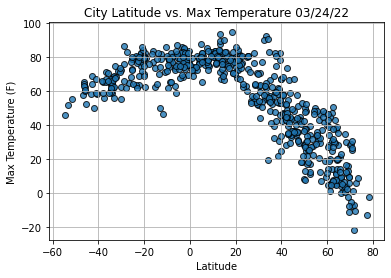

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

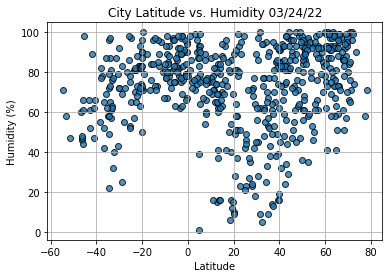

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

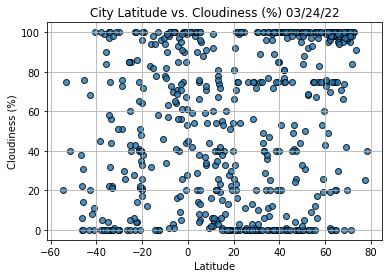

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

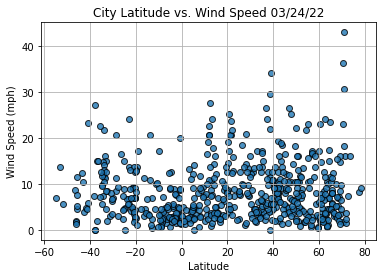

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()